In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./Mini'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading Data

In [3]:
train_data = pd.read_csv("C:\\Users\\II-Year\\Desktop\\Mini\\train.csv")
train_data.shape

(42000, 785)

In [4]:
test_data = pd.read_csv("C:\\Users\\II-Year\\Desktop\\Mini\\test.csv")
test_data.shape

(28000, 784)

In [5]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_data.isnull().sum().sum()

0

<AxesSubplot:xlabel='label', ylabel='count'>

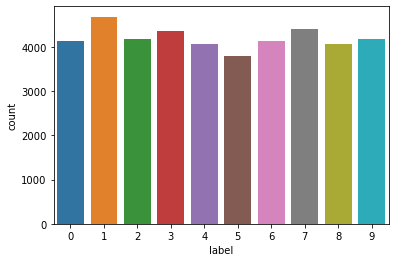

In [8]:
plt.figure()
sns.countplot(x=train_data.label)

# Reshape the data
reshape to 28x28 to apply CNN

In [9]:
# drop target and then reshape remaining data
train_data_2d=train_data.drop('label', axis=1)
train_data_2d=train_data_2d.values.reshape(-1,28,28,1)

test_data_2d=test_data.values.reshape(-1,28,28,1)

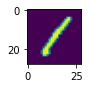

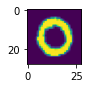

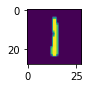

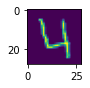

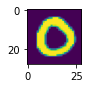

In [10]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(train_data_2d[i])
    plt.show()

In [11]:
train_data.label[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

# Splitting Data

In [12]:
X = train_data_2d
y = train_data.label

X_test = test_data_2d

In [13]:
# Normalize the data
X = X/255.0
X_test = X_test/255.0

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [15]:
train_shape = X_train.shape
train_shape

(33600, 28, 28, 1)

In [16]:
y_train.shape

(33600,)

# Modeling

In [17]:
model = keras.Sequential([
#     CNN base
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
#     dense head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
#     callbacks=[early_stopping],
    epochs=15,
)

Epoch 1/15
1050/1050 [==============================] - 15s 10ms/step - loss: 0.2010 - accuracy: 0.9385 - val_loss: 0.0761 - val_accuracy: 0.9748
Epoch 2/15
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0601 - accuracy: 0.9812 - val_loss: 0.0504 - val_accuracy: 0.9844
Epoch 3/15
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0585 - val_accuracy: 0.9835
Epoch 4/15
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 5/15
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 6/15
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0449 - val_accuracy: 0.9880
Epoch 7/15
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0483 - v

Best Validation Loss: 0.0428
Best Validation Accuracy: 0.9898


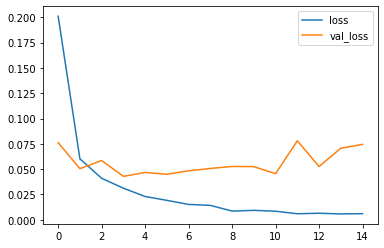

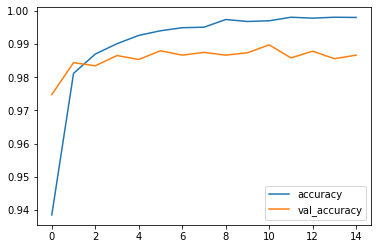

In [20]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

# Confusion Matrix

In [21]:
pred = model.predict(X_valid)
pred_valid = pd.DataFrame([np.argmax(i) for i in pred])
cm = tf.math.confusion_matrix(labels=y_valid,predictions=pred_valid)
cm

263/263 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[801,   0,   2,   0,   0,   0,  10,   0,   0,   0],
       [  0, 956,   1,   1,   0,   0,   1,   1,   1,   0],
       [  0,   0, 852,   1,   0,   0,   3,   4,   0,   0],
       [  0,   0,   0, 856,   0,   4,   0,   1,   0,   2],
       [  1,   4,   0,   0, 814,   0,   2,   3,   0,   3],
       [  0,   0,   2,   7,   0, 743,   4,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0, 840,   0,   0,   0],
       [  0,   1,   3,   1,   0,   1,   0, 893,   0,   0],
       [  1,   2,   2,   6,   1,   4,  13,   0, 736,   3],
       [  1,   0,   1,   0,   5,   3,   0,   4,   1, 797]])>

<AxesSubplot:>

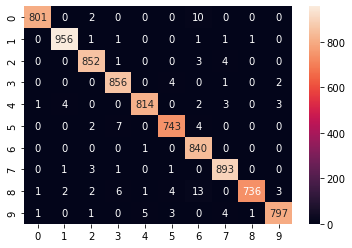

In [22]:
plt.figure()
sns.heatmap(cm, annot=True,fmt='d')

# Predictions
predictions on test data

In [42]:
preds = model.predict(X_test)
predictions = [np.argmax(i) for i in preds]
predictions = pd.Series(predictions,name="Label")

875/875 [==============================] - 2s 3ms/step


In [24]:
output = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

output.to_csv("submission.csv",index=False)

In [26]:
model.save_weights('model_weights.h5')

In [28]:
# Load the model architecture (assuming you have it saved as well)
from tensorflow.keras.models import load_model

# Create a new instance of your model (with the same architecture)
model = keras.Sequential([
#     CNN base
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
#     dense head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
  # Replace 'create_model' with the code to create your model

# Load the saved weights into the model
model.load_weights('model_weights.h5')

# Now, you can use this model for prediction as needed
preds = model.predict(X_test)
predictions = [np.argmax(i) for i in preds]
predictions = pd.Series(predictions,name="Label")


875/875 [==============================] - 3s 3ms/step


In [29]:
predictions

array([[2.39829535e-14, 1.50687426e-16, 1.00000000e+00, ...,
        1.27296728e-14, 1.54173728e-17, 3.18902179e-14],
       [1.00000000e+00, 7.17434789e-16, 1.65971716e-11, ...,
        1.25727147e-13, 1.03300358e-15, 4.20482659e-12],
       [1.58273398e-19, 8.31320960e-14, 4.22713461e-11, ...,
        3.13790525e-13, 1.57981660e-07, 9.99999762e-01],
       ...,
       [1.24036695e-32, 2.16744569e-20, 1.19257935e-27, ...,
        1.50767895e-24, 8.93378967e-18, 1.33199184e-13],
       [4.46886849e-18, 2.82670263e-13, 7.12252861e-14, ...,
        3.25452554e-10, 2.14936402e-09, 9.99990225e-01],
       [4.81815475e-16, 1.65909974e-15, 1.00000000e+00, ...,
        1.24226966e-11, 4.60613446e-16, 1.15066366e-15]], dtype=float32)

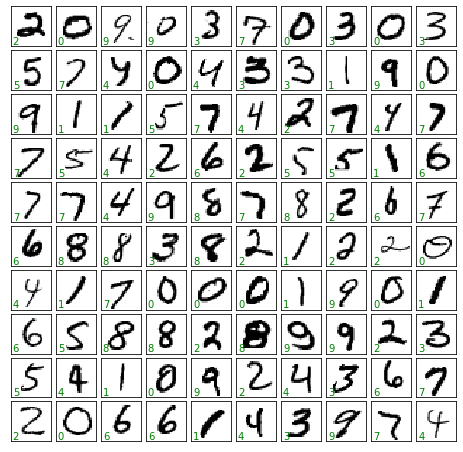

In [43]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Assuming you have 'predictions' as a list of predicted labels
# Modify 'X_test' if needed to match your variable names
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(predictions[i]),transform=ax.transAxes, color='green')

plt.show()
